In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

Mounted at /content/drive/
/content/drive/My Drive/Thesis


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve
from scipy.stats import norm

In [3]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [ ]:

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2  
  

r = np.sqrt(1-(norm.pdf(0)/0.5)**2)*0.5/norm.pdf(0)
p = fsolve(F, [4])
p



array([4.08363389])

In [ ]:

# Experiment 1:
# random numbers from uniform distribution
# Generate 10000 numbers from 0 to 1 (run actuion 10000 times)
np.random.seed(5)
n = 1000000
a = 1
b = 1000000000
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)

#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])

# np.isclose(F(x), [ 0.0])


data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = auction_exp(data_uniform,b/2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))
print(r)

worst case robust DAPX = [3.05937593]
Uniform distribution DAPX = [1.19187481]
Theoritically the DAPX_uniform:
[1.19311999]
0.5773502680349252


In [ ]:

#(1/np.sqrt(3) - 2/(1+b_a))
u = (a+b_a)/2
np.sqrt((b_a-a)**2/12)/u
u
def f_spe(x):
  return ((x/(x-1)-1)**3)/((2*(x/(x-1))-1)**2) - (1/np.sqrt(3) - 2/(np.sqrt(3)*(1+x)))**2 

b_a = fsolve(f_spe, [5])
#the result is the ratio of b over a
b_a
print(opt)
print(exp_revenue)

In [ ]:
#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(r_list, DAPX_uniform, 2))
#add fitted polynomial line to scatterplot
polyline = np.linspace(0.2, 0.5, 50)


fit1 = np.polyfit(r_list, DAPX_uniform, 2,full=True)
print(fit1)
fit2 = np.polyfit(r_list, DAPX_uniform, 3,full=True)
print(fit2)
fit3 = np.polyfit(r_list, DAPX_uniform, 4,full=True)
print(fit3)

(array([ 1.27229331, -0.39635363,  1.01584743]), array([5.60044326e-05]), 3, array([1.71814986, 0.21878689, 0.00966222]), 1.7763568394002505e-14)
(array([-3.73383765,  5.40248018, -1.8945457 ,  1.19391765]), array([2.19689157e-05]), 4, array([1.97328182e+00, 3.25064010e-01, 2.21740390e-02, 7.45486096e-04]), 1.7763568394002505e-14)
(array([  6.89949469, -13.90967817,  10.96536408,  -3.22994957,
         1.31265908]), array([2.16445001e-05]), 5, array([2.19419460e+00, 4.28980345e-01, 3.84984450e-02, 1.94940221e-03,
       5.51017290e-05]), 1.7763568394002505e-14)


In [4]:
#uniform distribution, changing sigma for unifrom distribution while keep u fixed

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
sigma_list = []
step = np.arange(0, 5, 0.1)
n = 100000
for i in step:
  b = 10 - i
  a = 10 -b
  u = (a+b)/2
  data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
  sigma = np.sqrt((b-a)**2/12)
 
  r = sigma/u
  r_list.append(r)
  sigma_list.append(sigma)
  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  print(F(p_d))
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  if (b/2 >= a):
    opt = auction_exp(data_uniform,b/2)
  else:
    opt = auction_exp(data_uniform,a)

 
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_uniform,reserve_p)

  DAPX_uniform.append((opt/exp_revenue)[0])  

[0.]
[0.]
[5.55111512e-17]
[2.22044605e-16]
[3.88578059e-16]
[9.43689571e-16]
[1.99840144e-15]
[4.49640325e-15]
[1.01307851e-14]
[2.77555756e-17]
[2.77555756e-17]
[-2.77555756e-17]
[-5.55111512e-17]
[0.]
[-2.77555756e-17]
[-2.77555756e-17]
[0.]
[2.77555756e-17]
[0.]
[2.77555756e-17]
[8.32667268e-17]
[1.94289029e-16]
[6.9388939e-16]
[2.3869795e-15]
[8.04911693e-15]
[1.38777878e-17]
[-1.38777878e-17]
[0.]
[1.38777878e-17]
[0.]
[-6.9388939e-18]
[2.77555756e-17]
[1.38777878e-16]
[1.0269563e-15]
[6.9458328e-15]
[-1.04083409e-17]
[-1.38777878e-17]
[1.38777878e-17]
[2.08166817e-17]
[2.25514052e-16]
[4.8398785e-15]
[-8.67361738e-18]
[3.46944695e-18]
[1.08420217e-16]
[4.33680869e-18]
[-2.16840434e-18]
[2.10638798e-15]
[9.75781955e-18]
[8.67361738e-19]
[2.03745983e-15]


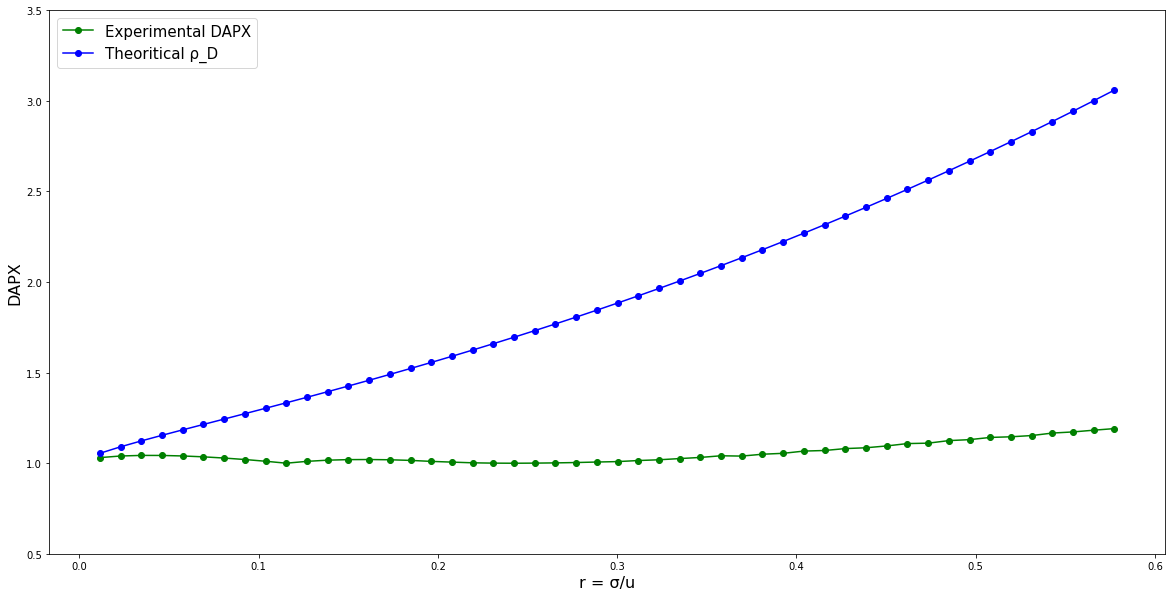

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_uniform,color="green",marker="o",label="Experimental DAPX")
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=16)
# set y-axis label
ax.set_ylabel("DAPX",fontsize=16)
ax.set_ylim(0.5,3.5)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
#ax2.set_ylabel("p_d",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 15)
plt.savefig("uniform_dapx.png")
plt.show()


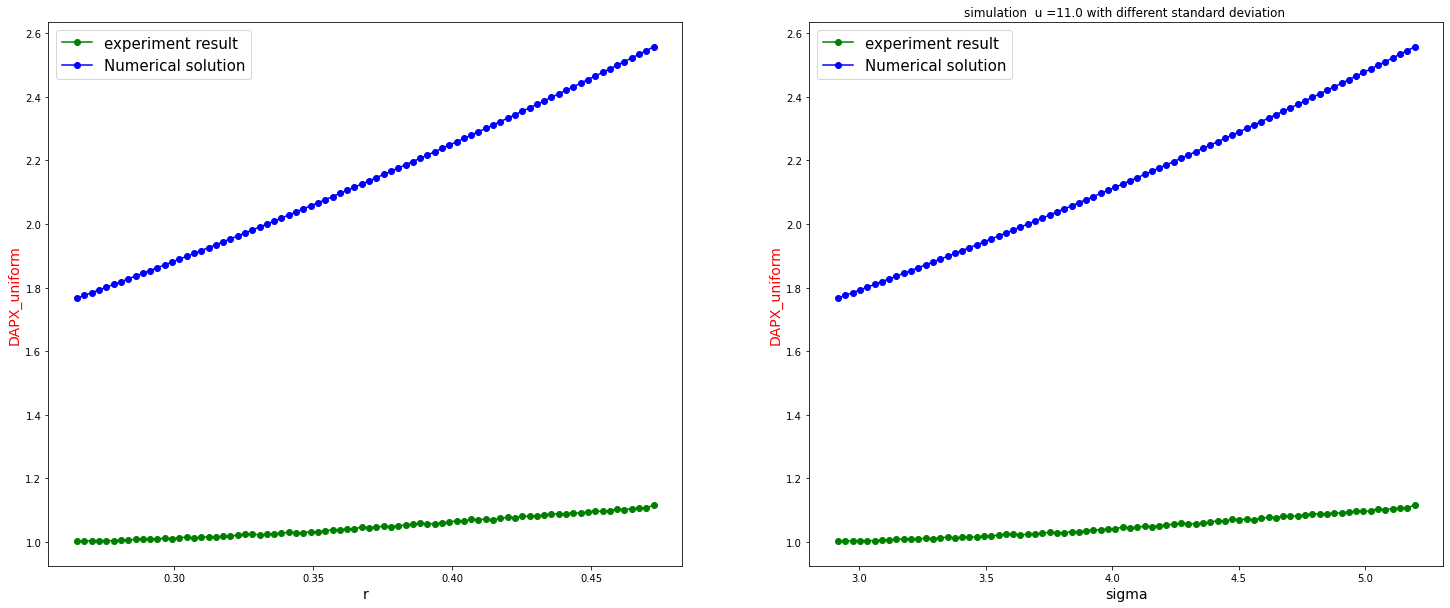

In [ ]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list, DAPX_uniform,color="green",marker="o",label="experiment result")
ax1.set_xlabel("r",fontsize=14)
ax1.set_ylabel("DAPX_uniform",color="red",fontsize=14)
ax1.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")

ax2.plot(sigma_list, DAPX_uniform,color="green",marker="o",label="experiment result")
ax2.set_xlabel("sigma",fontsize=14)
ax2.set_ylabel("DAPX_uniform",color="red",fontsize=14)
ax2.plot(sigma_list, p_d_list,color="blue",marker="o",label="Numerical solution")

plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

ax1.legend(loc="upper left",fontsize = 15)
ax2.legend(loc="upper left",fontsize = 15)

plt.show()


In [ ]:
#uniform distribution, changing b whiling keep a = 1
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
b_list = []
a = 1
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
n = 1000000
for i in np.arange(50):
  b = 2 + i
  b_list.append(b)
  u = (a+b)/2
  data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
  sigma = np.sqrt((b-a)**2/12)
  r = sigma/u
  r_list.append(r)
  sigma_list.append(sigma)
  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  print(F(p_d))
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt = auction_exp(data_uniform,b/2)
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_uniform,reserve_p)

  DAPX_uniform.append((opt/exp_revenue)[0])  

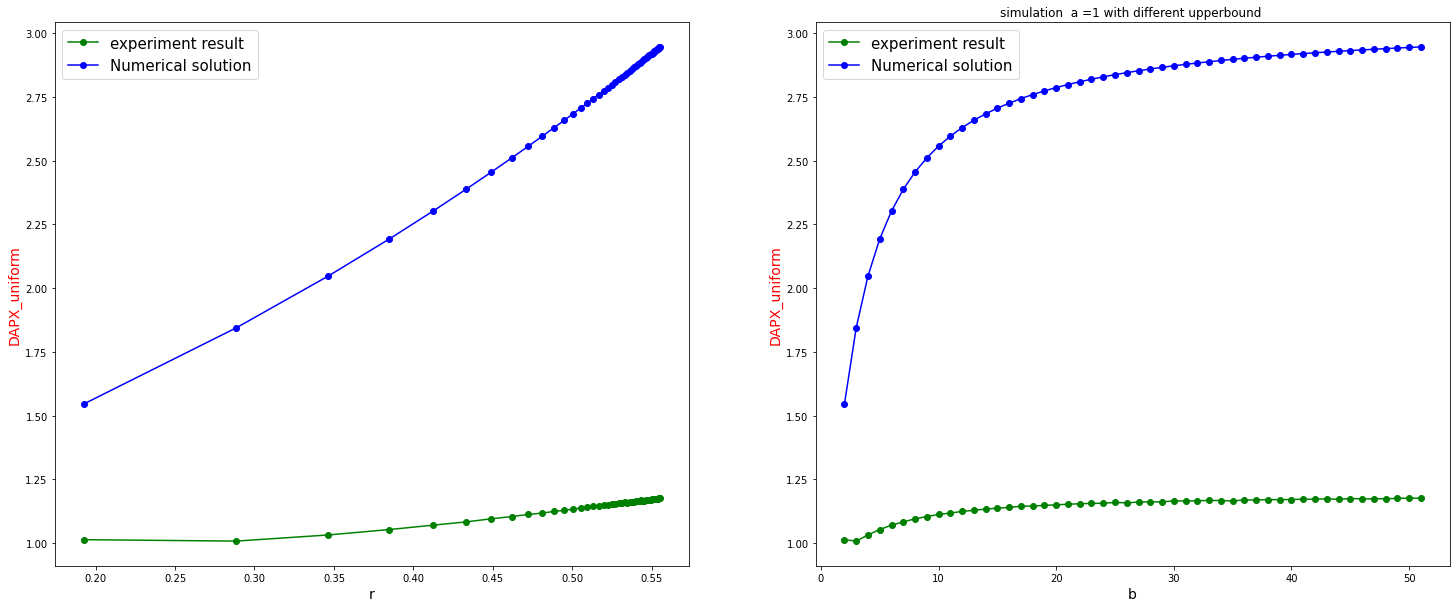

In [ ]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list, DAPX_uniform,color="green",marker="o",label="experiment result")
ax1.set_xlabel("r",fontsize=14)
ax1.set_ylabel("DAPX_uniform",color="red",fontsize=14)
ax1.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")

ax2.plot(b_list, DAPX_uniform,color="green",marker="o",label="experiment result")
ax2.set_xlabel("b",fontsize=14)
ax2.set_ylabel("DAPX_uniform",color="red",fontsize=14)
ax2.plot(b_list, p_d_list,color="blue",marker="o",label="Numerical solution")

plt.title('simulation'+ '  a =' +str(a)+' with different upperbound ')
ax1.legend(loc="upper left",fontsize = 15)
ax2.legend(loc="upper left",fontsize = 15)
plt.show()

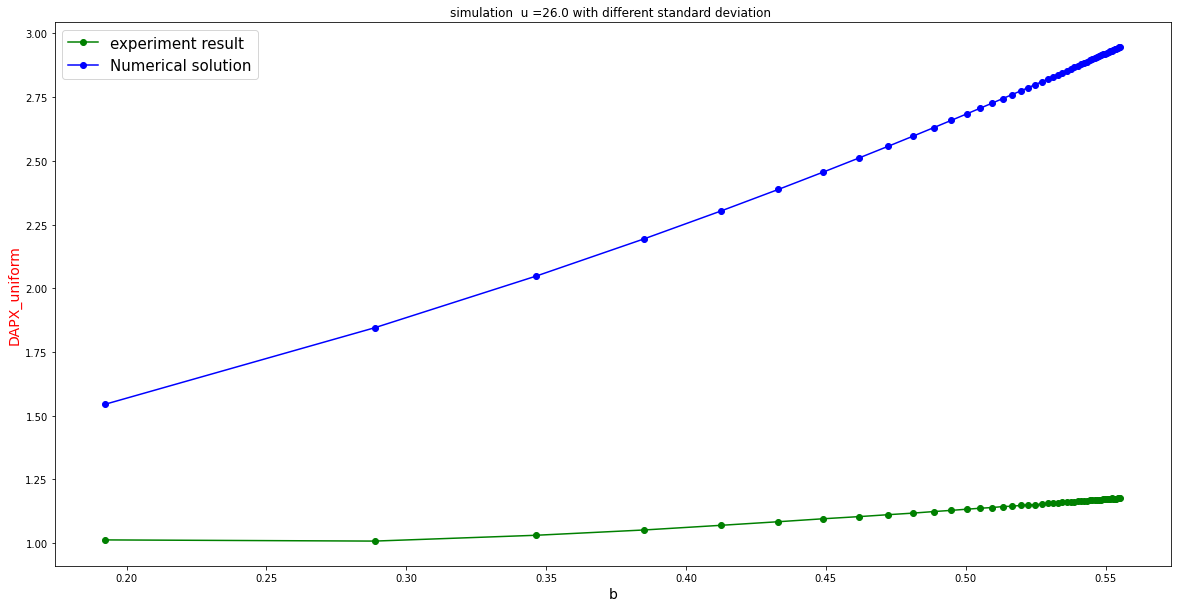

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_uniform,color="green",marker="o",label="experiment result")
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_xlabel("b",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX_uniform",color="red",fontsize=14)

ax.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")
#ax2.set_ylabel("p_d",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 15)

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


[nan]
[1.00224691]
[1.01140861]
[1.01736392]
[1.02039438]
[1.02072691]
[1.01854818]
[1.01401454]


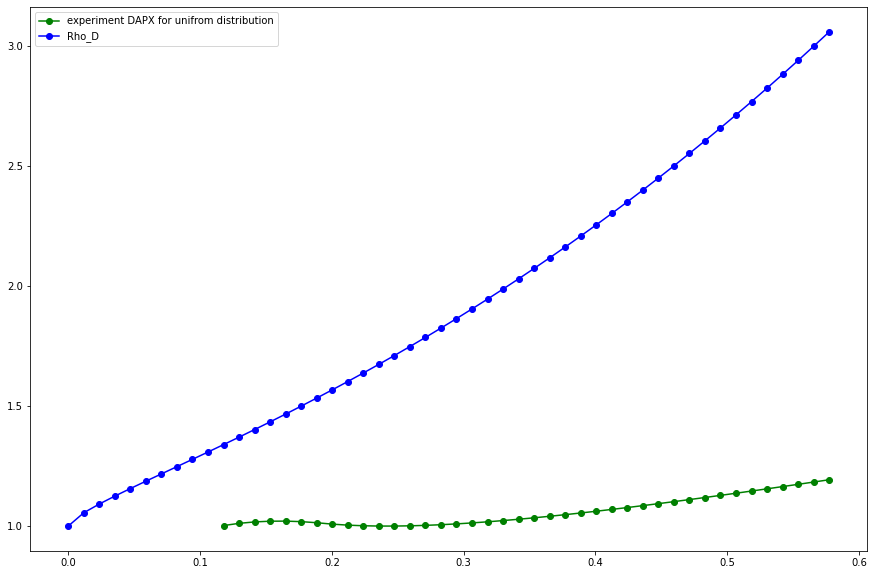

In [ ]:
rr = np.linspace(0, 1/np.sqrt(3), 50)
#assum a = 1 

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2  

rho_list = []
exp = []
b_list = []
price_list=[]
for r in rr:
  b = 2/(1-np.sqrt(3)*r) -1
  b_list.append(b)
  rho = fsolve(F, [1])
  rho_list.append(rho)
  c= rho/(2*rho-1)
  price_list.append(c/(1-np.sqrt(3)*r))
  if c/(1-np.sqrt(3)*r) >= 1:
    if (b/2 < 1) :
      ratio = 2*np.sqrt(3)*r*(1-np.sqrt(3)*r)/(c*(np.sqrt(3)*r + 1 - c))
      print(ratio)
    else:
      ratio = (r*np.sqrt(3)+1)**2/(4*c*(r*np.sqrt(3)+1-c))
#  else:
#    print(r)

  exp.append(ratio)
plt.figure(figsize=(15,10))
plt.plot(rr, exp,color="green",marker="o",label="experiment DAPX for unifrom distribution")
plt.plot(rr, rho_list,color="blue",marker="o",label="Rho_D")
plt.legend(loc="upper left")
plt.show()

In [ ]:
r = 0.10604392699401291
b = 2/(1-np.sqrt(3)*r) -1
print(np.sqrt(3)/9)

0.19245008972987523


In [ ]:
#This is used to find a type of uniform distribution that can reach the optimal revenue
def f_spe(x):
  return ((x/(x-1)-1)**3)/((2*(x/(x-1))-1)**2) - (1/np.sqrt(3) - 2/(np.sqrt(3)*(1+x)))**2 

b_a = fsolve(f_spe, [5])
#the result is the ratio of b over a
print(b_a)

n = 1000000
#wlog we can simply set a = 1 and b = b_a
a = 1
data_uniform = uniform.rvs(loc=a, scale=b_a-a,size=n)
u = (a+b_a)/2
sigma = np.sqrt((b_a-a)**2/12)

#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(p_d)
reserve_p = p_d*u/(2*p_d-1)
print(reserve_p)
print(b_a/2)
opt = auction_exp(data_uniform,b_a /2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b_a**2/(4*(b_a-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b_a-a))))

[2.44224957]
[1.69336127]
[1.22112479]
[1.22112479]
worst case robust DAPX = [1.69336127]
Uniform distribution DAPX = [1.]
Theoritically the DAPX_uniform:
[1.]


In [ ]:
#randomly generate a and b

sigma_list1 = []
DAPX_uniform1 = []
r_list1 =[]
reserve_p_list1 = []
p_d_list1 =[]
n=100000

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   

for i in np.arange(100):
  b = uniform.rvs(loc=0, scale=10)
  a = uniform.rvs(loc=0, scale=10)
  u = (a+b)/2
  sigma = np.sqrt((b-a)**2/12)
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #r_list.append(sigma/u)
  r = sigma/u
  data_uniform = uniform.rvs(loc=min(a,b), scale=abs(b-a),size=n)
  p_d = fsolve(F, [u])
  reserve_p = p_d*u/(2*p_d-1)

  opt = auction_exp(data_uniform,max(a,b)/2)
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_uniform,reserve_p)
  ratio = (opt/exp_revenue)[0]
  #DAPX_uniform.append(ratio) 
  if ratio <= 1:
    DAPX_uniform1.append(ratio)
    r_list1.append(r) 
    reserve_p_list1.append(reserve_p)
    p_d_list1.append(p_d)

   



In [ ]:
p_d_list

[array([1.27839556]),
 array([1.03879385]),
 array([1.40184561]),
 array([1.1243649]),
 array([1.35292873])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


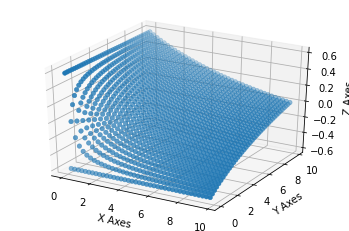

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d  


fig = plt.figure()
ax = plt.axes(projection="3d")

a = np.arange(0, 10, 0.25)
b = np.arange(0, 10, 0.25)
a, b = np.meshgrid(a, b)
r = (b-a)/(np.sqrt(3)*(b+a))

#ax.plot_surface(a,b,r)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Z Axes')

ax.scatter(a, b, r, cmap='viridis', linewidth=0.5)

plt.show()

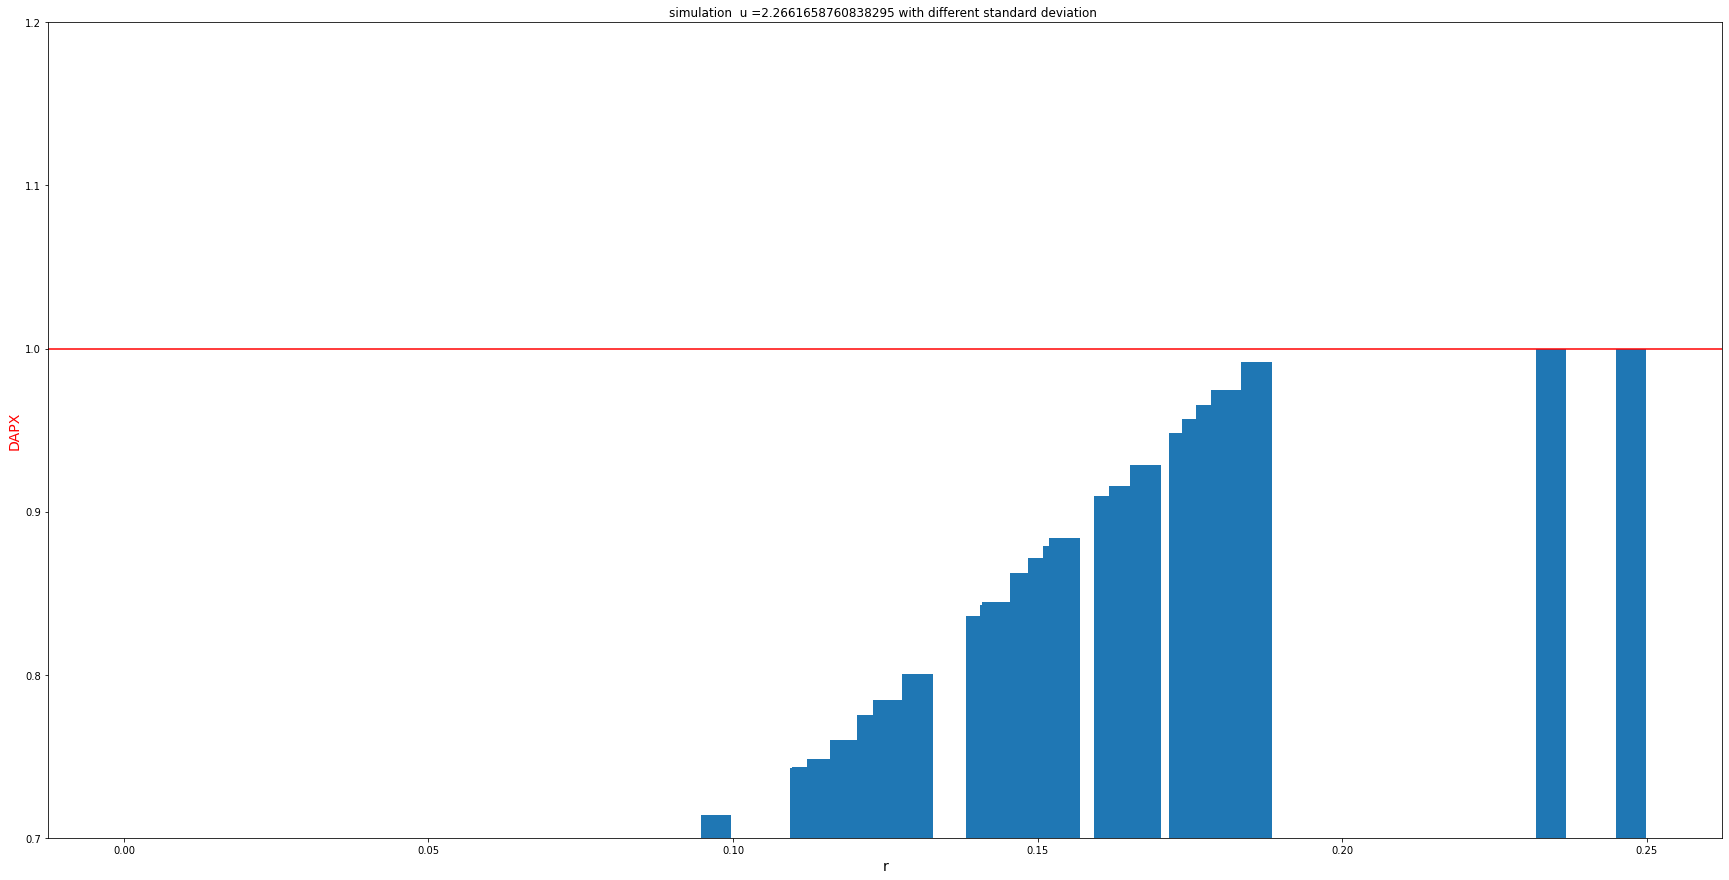

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(30, 15))
# make a plot
ax.bar(r_list1, DAPX_uniform1, width = 0.005)

# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX",color="red",fontsize=14)
ax.set_ylim(0.7,1.2)
ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(sigma_list, diff,color="blue",marker="o")
#ax2.set_ylabel("difference",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.show()

In [ ]:
# Experiment 2:
# This time, we use two mass point distribution, wlog, set x = 1, and y = 2, x with probably 1-a, and y with probability a
n = 1000
x=1
y=2
DAPX = 0
reserve_p = np.arange(1, 2.01, 0.01)
a = np.arange(0, 1, 0.1)
exp_revenue_list = []
for i in a:
  data_bin = binom.rvs(1, i, size = n) + 1
  exp_revenue = []
  for p in reserve_p: 
    exp_revenue.append(auction_exp(data_bin,p))

  exp_revenue_list.append(exp_revenue)
  mean = y*i + x*(1-i)
  DAPX = 1 + 4*((i*np.power(y,2) + (1-i)*np.power(x,2))/(i*np.power(mean,2)) - 1)
  plt.title('when probility a =' + str(1-i) +' u ='+str(mean)+' DAPX ='+str(DAPX))
  plt.bar(reserve_p,exp_revenue, width=0.005)
  plt.show()



In [ ]:
# Experiment 3:
# This time, we use exponential distribution, wlog, set lambda = 1
from scipy.stats import expon

#scale = 1/lambda
lambda1 = 1
n = 1000000
data_expon = expon.rvs(size=n,scale = 1/lambda1)



u = 1/lambda1
sigma = 1/lambda1


#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            


p_d = fsolve(F, [u])
#p_d = 1 + 4* (sigma/u)**2 #solve p the equation in definition 1
reserve_p = p_d*u/(2*p_d-1)


p_opt = 1/lambda1

opt = 1/(lambda1*np.exp(1))
exp_revenue = auction_exp(data_expon,reserve_p)
opt_revenue = auction_exp(data_expon,p_opt)
DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Exponential distribution DAPX = ' + str(DAPX))






worst case robust DAPX = [5.86453651]
Exponential distribution DAPX = [1.16179766]


In [ ]:
DAPX_exp


In [ ]:
lambda_list = np.arange(0.1, 5, 0.1)
DAPX_exp = []
diff = []
p_d_list = []

for i in lambda_list: 
  data_expon = expon.rvs(size=n,scale = 1/i)
  u = 1/i
  sigma = 1/i
  r = sigma/u
  p_d = fsolve(F, [2])
  reserve_p = p_d*u/(2*p_d-1)
  p_d_list.append(p_d)
  #opt = 1/(i*np.exp(1))
  opt = auction_exp(data_expon,1/i)
  exp_revenue = auction_exp(data_expon,reserve_p)

  DAPX_exp.append(opt/exp_revenue)


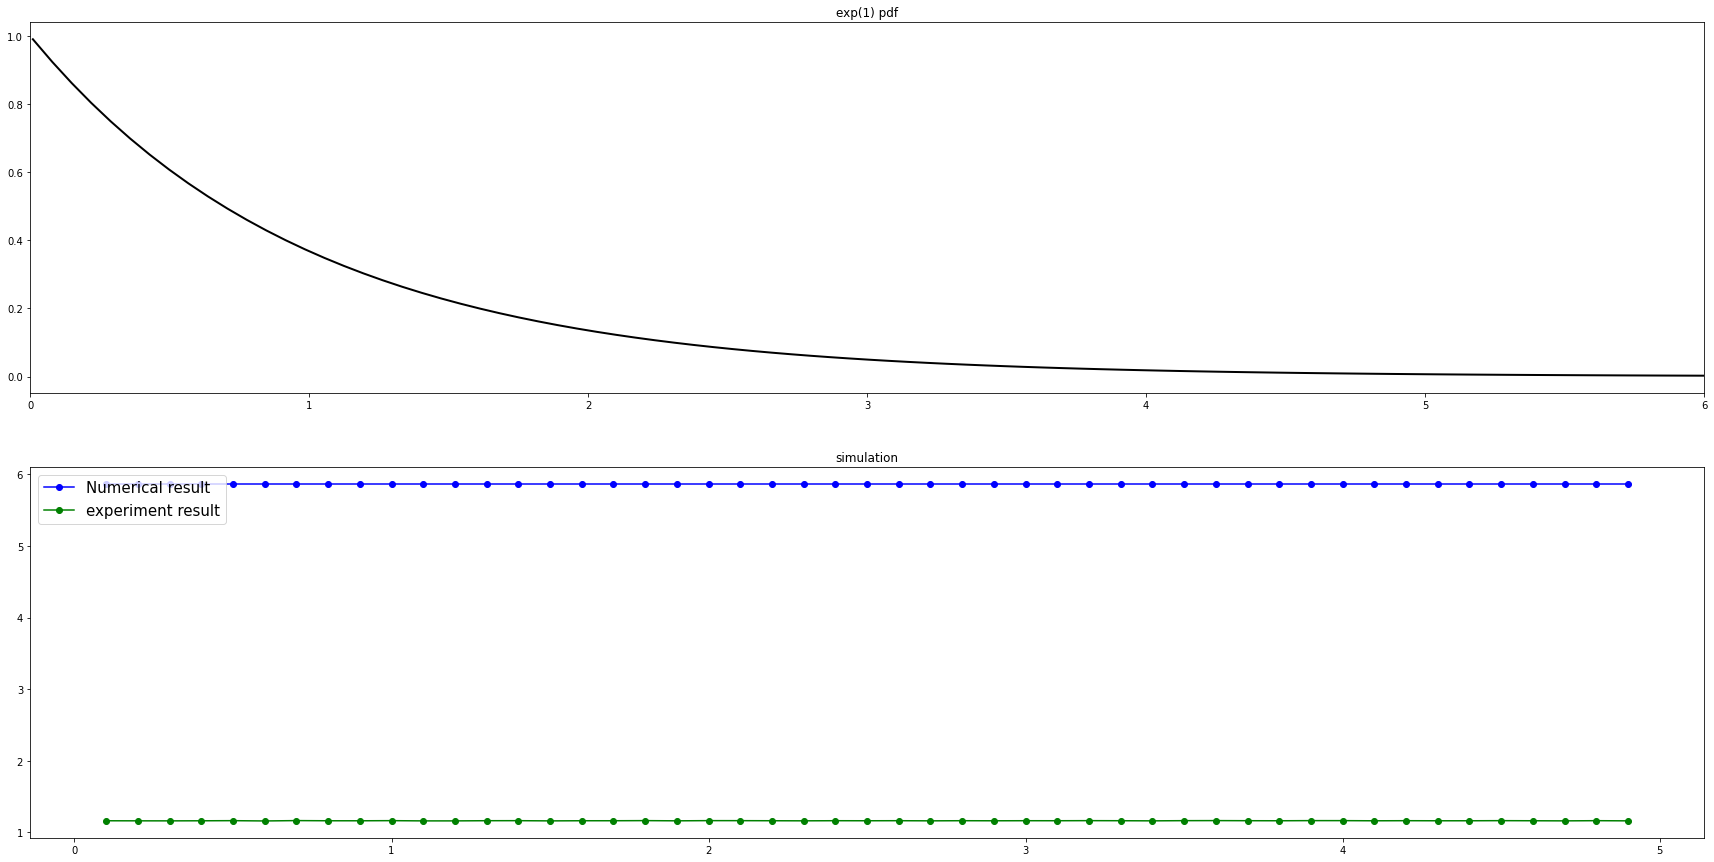

In [ ]:
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.999), 100)
fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(30, 15))

rv = expon()
ax1.set_title('exp(1) pdf')
ax1.set_xlim(0,6)
ax1.plot(x, rv.pdf(x), 'k-', lw=2)
ax2.set_title('simulation')

ax2.plot(lambda_list, p_d_list,color="blue",marker="o",label="Numerical result")
ax2.plot(lambda_list, DAPX_exp,color="green",marker="o",label="experiment result")
plt.legend(loc="upper left",fontsize = 15)
# reference x so you don't need to change the range each time x changes
# xlocs=[i for i in lambda_list]
# xlabs=[i for i in lambda_list]
# ax2.set_xlabel('lambda value')
# ax2.set_xticks(xlocs, xlabs)

# for i, v in enumerate(DAPX_exp):
#     plt.text(xlocs[i], v + 0.01, str(round(v,2)))

In [ ]:
# Experiment 4:
# This time, we use poisson distribution
from scipy.stats import poisson
import scipy.optimize
import scipy.special as sc
n=100000
mu = 2
data_poi = poisson.rvs(mu,size=n)


u = mu
sigma = mu

p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)


#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-sc.pdtr(x, mu))/((mu**x)*np.exp(-mu)/sc.factorial(x)))
x = fsolve(F, mu-0.5)

opt = x*(1-sc.pdtr(x, mu))
exp_revenue = auction_exp(data_poi,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Exponential distribution DAPX = ' + str(DAPX))



worst case robust DAPX = 5.0
Exponential distribution DAPX = [1.81566232]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
reserve_p = np.arange(0, 8, 0.05)
exp_revenue = []
for p in reserve_p: 

  exp_revenue.append(auction_exp(data_poi,p))

In [ ]:
import scipy.special as sc
#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-sc.pdtr(x, 2))/((2**x)*np.exp(-2)/sc.factorial(x)))
import scipy.optimize
from scipy.optimize import fsolve
x = fsolve(F, 2.1)
x

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1.99997422])

In [ ]:
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return -x*(1-sc.pdtr(x, 2))

x0 = 1.9
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: -1.187988
         Iterations: 35
         Function evaluations: 70


array([1.99999999])

In [ ]:
x = 1.9999999
x*(1-sc.pdtr(x, 2))
mu =2
u = mu
sigma = mu

p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
reserve_p

1.1111111111111112

In [ ]:

fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(30, 15))
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.999999, mu))


ax1.set_title('poi(1) pdf with 0.99999')

ax1.plot(x, poisson.pmf(x, mu), 'bo', ms=8)
ax1.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax2.set_title('simulation'+ '  max rev =' +str(max(exp_revenue))+' with p = '+str(reserve_p[inx]))
ax2.bar(reserve_p,exp_revenue, width=0.02)